# Deep Learning

1. inputs need to reflect position in arena and odor (NOT CONJUNCTIONS)
2. outputs need to reflect action values
3. actions are selected via softmax on output neuron activity. 
4. RPE requires knowing value of new state
   -- so this will require a forward pass using "new state" inputs.

In [66]:
# Import packages
import numpy as np

# %matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

In [2]:
# Load custom functions
from utils import Params
from deep_learning import Network

In [3]:
# Formatting & autoreload stuff
%load_ext lab_black
%load_ext autoreload
%autoreload 2
sns.set_theme(font_scale=1.5)
mpl.rcParams["font.family"] = ["Fira Sans", "sans-serif"]

## Main options

In [4]:
nTrain = 1000000
nTest = 100

In [5]:
nTot = nTrain + nTest
# create two normal input channels
X = np.random.multivariate_normal([0, 0], 10 * np.eye(2), size=nTot)
# X = pd.read_csv("X.csv", header=None).to_numpy()
# y is positive if X(1) & X(2) are positive, OR if X(1) and X(2) are negative.
X.shape

(100100, 2)

In [6]:
y = np.sign(X[:, 0] * X[:, 1]) / 2.0 + 0.5
y.shape

(100100,)

## Choose the task parameters

In [7]:
# Choose the parameters for the task
p = Params(learning_rate=0.001, nLayers=6, nHiddenUnits=20)
p

Params(seed=None, rng=None, n_runs=10, total_episodes=100, epsilon=0.1, gamma=0.8, alpha=0.05, jointRep=True, learning_rate=0.001, nLayers=6, nHiddenUnits=20, action_size=None, state_size=None)

## Step 2: Build network

In [8]:
net = Network(
    nInputUnits=X.shape[1],
    nLayers=p.nLayers,
    nOutputUnits=1,
    nHiddenUnits=p.nHiddenUnits,
    initVar=1,
)

In [9]:
# Weights matrices shapes
[layer.shape for layer in net.wtMatrix]

[(2, 20), (20, 20), (20, 20), (20, 20), (20, 1)]

## Step 3: Train network

In [10]:
# allError = np.nan * np.ones(nTot)
# y_hat = np.nan * np.ones(nTot)

# for i in tqdm(range(nTrain)):
#     activity = net.forward_pass(nLayers=p.nLayers, X=X, obs=i)

#     # Take an action! softmax over actions or similar

#     # incorporate your model of the task, to determine where agent actually goes.

#     # Now you need to do another forward pass, to see how good the new
#     # state is so that you can compute the RPE below.

#     # your cost function will differ from the one below,
#     # should look something like this:
#     # C =  R - X(S)*W+ DISCOUNT*max(X(S')*W)

#     delta = net.backward_pass(nLayers=p.nLayers, y=y, activity=activity, obs=i)

#     # Update weight matrices according to gradients and activities:
#     for j in range(len(net.wtMatrix) - 1):
#         # net.wtMatrix[j] = (
#         #     net.wtMatrix[j]
#         #     + p.learning_rate * np.expand_dims(activity[j], axis=1) * delta[j + 1].T
#         # )
#         net.wtMatrix[j] = net.gradient_descent(
#             weight=net.wtMatrix[j],
#             learning_rate=p.learning_rate,
#             activity=activity[j],
#             delta=delta[j + 1],
#         )

#     # store error:
#     allError[i] = delta[-1]
#     y_hat[i] = activity[-1] > 0.5

In [11]:
allError, y_hat, delta, activity = net.backprop(
    X=X, y=y, nLayers=p.nLayers, learning_rate=p.learning_rate
)

In [12]:
y_hat = y_hat > 0.5
y_hat

array([False, False, False, ...,  True, False,  True])

In [13]:
activity

[array([ 5.50118503, -0.14253241]),
 array([6.57978668e-04, 1.59443639e-01, 3.86816931e-02, 9.34388460e-01,
        4.72130778e-01, 2.35254726e-01, 4.58834739e-07, 9.99261957e-01,
        4.58873946e-01, 7.73409648e-01, 2.12009594e-02, 9.60949836e-01,
        2.24800269e-01, 1.09557210e-01, 2.87696521e-03, 2.43242793e-02,
        1.02317134e-01, 7.49838228e-08, 9.55583858e-01, 9.99937496e-01]),
 array([0.04490859, 0.87747108, 0.22711569, 0.73967734, 0.9596833 ,
        0.08524534, 0.34488945, 0.33701243, 0.14154752, 0.64460213,
        0.94784106, 0.34092235, 0.98799635, 0.83774185, 0.91996204,
        0.92603568, 0.99410309, 0.07567116, 0.91299727, 0.27350692]),
 array([0.39136971, 0.02827077, 0.59808251, 0.65497511, 0.02590991,
        0.91034705, 0.27685983, 0.91136833, 0.17799569, 0.92770286,
        0.41758717, 0.71279814, 0.78961421, 0.01005639, 0.10129178,
        0.94659696, 0.01766059, 0.7783847 , 0.00561515, 0.06038902]),
 array([0.45071369, 0.89427339, 0.19575408, 0.71291152

In [14]:
delta

[array([-0.02905474,  0.00265981]),
 array([ 3.97583271e-06, -5.31140487e-03, -5.41863076e-05,  2.23878606e-03,
        -1.83946852e-03, -1.30560187e-03, -6.28846277e-09,  1.22679789e-05,
         5.59926064e-03, -1.06146829e-02, -5.03645339e-04, -3.10682093e-04,
         3.17368604e-03, -3.26353347e-03, -1.88414018e-06, -2.36315417e-04,
         4.22145553e-04, -7.64262250e-10,  7.10424382e-04, -7.84425348e-07]),
 array([ 1.16454443e-03, -2.83398395e-03, -4.04766770e-03, -2.04559662e-03,
         1.08523003e-03, -4.44800797e-03, -1.52707353e-02, -1.05963882e-02,
         5.86154299e-03,  6.13639722e-03, -5.02150198e-03,  1.19166197e-02,
        -8.77001038e-04,  1.34652941e-03,  8.70169672e-03,  6.84115518e-04,
         9.95781372e-05,  7.20467351e-03,  1.90856244e-03,  5.41382106e-03]),
 array([ 1.08706724e-02, -3.08271535e-04,  3.39583409e-02, -2.24172076e-03,
        -1.14509467e-03, -9.38075926e-04,  1.29453025e-02, -7.16434929e-05,
        -2.89270409e-02, -3.41309655e-03,  1.355

In [15]:
allError

array([-0.06583009,  0.17733424, -0.0416492 , ...,  0.11439812,
       -0.1063287 , -0.12582134])

In [16]:
y_hat

array([False, False, False, ...,  True, False,  True])

In [17]:
Bins = np.round(np.linspace(0, len(allError), num=100)).astype(int)

meanError = np.zeros_like(Bins) * np.nan
for i in range(len(Bins) - 1):
    meanError[i] = np.nanmean(abs(allError[Bins[i] : Bins[i + 1]]))
meanError

array([0.12232517, 0.11901713, 0.11740998, 0.11742677, 0.11739367,
       0.11659747, 0.11510995, 0.11545045, 0.11526753, 0.11423979,
       0.11426303, 0.11342693, 0.11309967, 0.11292351, 0.11302217,
       0.11236003, 0.11202353, 0.11147131, 0.11214573, 0.1110543 ,
       0.11141511, 0.11081684, 0.1112093 , 0.11040939, 0.11028963,
       0.11062975, 0.11031335, 0.10987898, 0.10958899, 0.10910854,
       0.10902904, 0.10938977, 0.10954097, 0.10913566, 0.10811271,
       0.1083031 , 0.10785406, 0.10774096, 0.10745622, 0.10737798,
       0.1067707 , 0.10676224, 0.10633076, 0.1063721 , 0.10589164,
       0.10593846, 0.10621606, 0.10548717, 0.10543477, 0.10545056,
       0.10472134, 0.10491422, 0.10510945, 0.10457529, 0.10405716,
       0.10369216, 0.10445041, 0.10397024, 0.10303828, 0.10234253,
       0.10259841, 0.10295893, 0.10254023, 0.10280937, 0.10291167,
       0.102558  , 0.10185044, 0.10170714, 0.10136313, 0.10092775,
       0.1008518 , 0.10085318, 0.09985507, 0.10050941, 0.10034

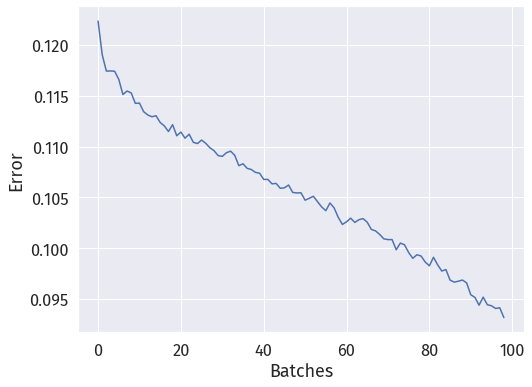

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
chart = sns.lineplot(meanError, ax=ax)
ax.set_ylabel("Error")
ax.set_xlabel("Batches")
plt.show()

In [63]:
weights_avg = np.nan * np.empty((1, len(net.wtMatrix)))
weights_std = np.nan * np.empty((1, len(net.wtMatrix)))
for w_id, w_val in enumerate(net.wtMatrix):
    weights_avg[0, w_id] = w_val.mean()
    weights_std[0, w_id] = w_val.std()
weights_metrics_avg = pd.DataFrame(weights_avg)
weights_metrics_std = pd.DataFrame(weights_std)

In [64]:
weights_metrics_avg

,0,1,2,3,4
0,-0.177754,0.117523,-0.052383,-0.069865,0.187039


In [65]:
weights_metrics_std

,0,1,2,3,4
0,1.290328,1.049904,1.045384,1.037623,0.889373


In [67]:
grads_avg = np.nan * np.empty((1, len(delta)))
grads_std = np.nan * np.empty((1, len(delta)))
for d_id, d_val in enumerate(delta):
    grads_avg[0, d_id] = d_val.mean()
    grads_std[0, d_id] = d_val.std()
grads_metrics_avg = pd.DataFrame(grads_avg)
grads_metrics_std = pd.DataFrame(grads_std)

In [68]:
grads_metrics_avg

,0,1,2,3,4,5
0,0.039571,0.001234,0.000517,0.001661,0.002889,0.042018


In [69]:
grads_metrics_std

,0,1,2,3,4,5
0,0.025908,0.016294,0.011689,0.010419,0.004933,0.0


## Step 4: Test Network

In [19]:
for obs in range((nTrain + 1), nTot):
    activity = net.forward_pass(x_obs=X[obs, :])

    # store error
    allError[obs] = delta[-1]
    y_hat[obs] = activity[-1] > 0.5

isTest = np.zeros(nTot, dtype=bool)
isTest[nTrain + 1 :] = True

In [20]:
activity

[array([ 5.50118503, -0.14253241]),
 array([6.57978747e-04, 1.59422083e-01, 3.86816321e-02, 9.34392617e-01,
        4.72116894e-01, 2.35247612e-01, 4.58834739e-07, 9.99261957e-01,
        4.58916051e-01, 7.73353310e-01, 2.12006429e-02, 9.60949483e-01,
        2.24817018e-01, 1.09547569e-01, 2.87696505e-03, 2.43241095e-02,
        1.02318309e-01, 7.49838228e-08, 9.55584772e-01, 9.99937496e-01]),
 array([0.04490658, 0.87747674, 0.22713693, 0.7396403 , 0.95968399,
        0.08524011, 0.34483889, 0.33698056, 0.1415651 , 0.64460552,
        0.94783729, 0.34097653, 0.98799518, 0.83773465, 0.91997402,
        0.92604183, 0.99410333, 0.07567427, 0.91299224, 0.27350903]),
 array([0.39141562, 0.02827672, 0.59817419, 0.65495723, 0.02590713,
        0.91034269, 0.27691873, 0.91136998, 0.17794358, 0.92770081,
        0.41764672, 0.71278076, 0.78959694, 0.01005684, 0.10128856,
        0.94659944, 0.0176592 , 0.77835451, 0.00561528, 0.06038858]),
 array([0.45070672, 0.8942674 , 0.19582227, 0.71297868

In [21]:
allError

array([-0.06583009,  0.17733424, -0.0416492 , ..., -0.12582134,
       -0.12582134, -0.12582134])

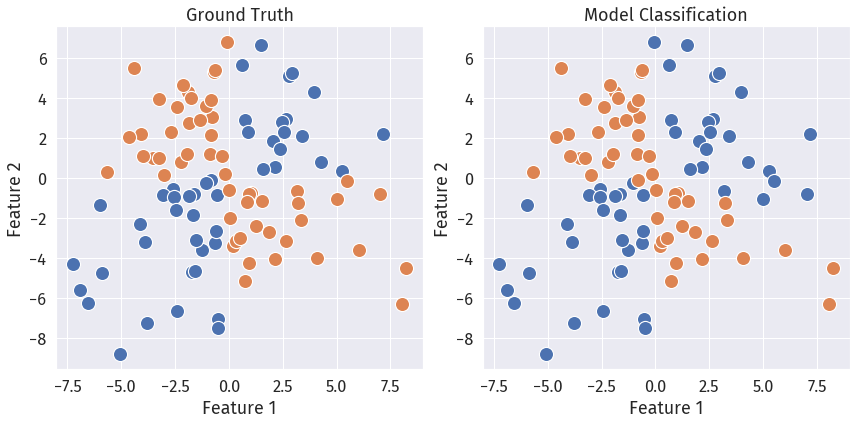

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title("Ground Truth")
sns.scatterplot(
    x=X[(y == 1) & isTest, 0],
    y=X[(y == 1) & isTest, 1],
    s=200,
    ax=ax[0],
)
sns.scatterplot(
    x=X[(y == 0) & isTest, 0],
    y=X[(y == 0) & isTest, 1],
    s=200,
    ax=ax[0],
)
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")


ax[1].set_title("Model Classification")
sns.scatterplot(
    x=X[(y_hat == 1) & isTest, 0],
    y=X[(y_hat == 1) & isTest, 1],
    s=200,
    ax=ax[1],
)
sns.scatterplot(
    x=X[(y_hat == 0) & isTest, 0],
    y=X[(y_hat == 0) & isTest, 1],
    s=200,
    ax=ax[1],
)
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

fig.tight_layout()
plt.show()